In [12]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=\
                          SpotifyClientCredentials(client_id='10abcd80153e480aa1309b5782db7a0a',\
                                                   client_secret='c6c037c908344f439fe469dcfbfb8918'),\
                                                      requests_timeout=50)
pd.set_option('display.max_rows', None)


In [2]:
# Username and playlist URIs
my_username = 'mythreya75'
bruh_uri = 'spotify:playlist:5aSx3MwComNfCHqbl5AILS'
#dftr_uri = 'spotify:playlist:64qKTfGYPzL8eOqqYrLrSy'
edm_uri = 'spotify:playlist:6n1PxIopr5Sz60VBwDGpuq'
carl_uri = 'spotify:user:wc167m3f2872orl0152wn1gwg'
carlsPlaylistURI = 'spotify:playlist:6Qn4VdrEu9pUrPZBVZTE6C'

# List of playlists for getAllTracks to iterate through 
playlistURI_List = [[carlsPlaylistURI, carl_uri]]
# playlistURI_List = [[bruh_uri, my_username],[edm_uri, my_username]]

In [3]:
def get_playlist_tracks(username,playlist_id):
    results = spotify.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        tracks.extend(results['items'])
        
    return tracks

# Finds track features for a every song in a playlist
# Parameters => username, playlistURI
# Returns => dictionary of tracks and features 
# (track_features[track_name] = feature_data)
def findTrackFeatures(username, playlistURI):
    count = 1
    offset = 100
    playlistDict = get_playlist_tracks(username, playlistURI)
    track_features = {}
    for track in playlistDict:
        if count % offset == 0 or count == 1:
            print(f"Fetched {count}/{len(playlistDict)} songs")
        elif count == len(playlistDict)-1:
            print(f"Fetched all songs!")
        try:  
            trackID = track['track']['id']
            track_year = track['track']['album']['release_date'][:4]
            feature_data = list(spotify.audio_features(trackID)[0].values())
            feature_data.append(track_year)
            # print(spotify.audio_features(ids)[0])
            track_features[track['track']['name']] = feature_data
            count += 1
        except: pass
    
    return track_features

# Combines track_features dictionaries for every playlist in playlistURI_list
# Parameters => playlists (list of playlists)
# Returns => every tracksAndFeatures in every playlist from input
def getAllTracks(playlists):
    all_tracks = {}
    for playlist in playlists:
        playlistURI = playlist[0]
        print(spotify.playlist(playlist_id=playlistURI,fields="name")['name'], end=":\n")
        
        user = playlist[1]
        
        newPlaylistTrackFeatures = findTrackFeatures(user, playlistURI)
        
        all_tracks = all_tracks | newPlaylistTrackFeatures
        print("\n")
        
    return all_tracks

tracksAndFeatures = getAllTracks(playlistURI_List)

The longest rap playlist (415H):
Fetched 1/7726 songs
Fetched 100/7726 songs
Fetched 200/7726 songs
Fetched 300/7726 songs
Fetched 400/7726 songs
Fetched 500/7726 songs
Fetched 600/7726 songs
Fetched 700/7726 songs
Fetched 800/7726 songs
Fetched 900/7726 songs
Fetched 1000/7726 songs
Fetched 1100/7726 songs
Fetched 1200/7726 songs
Fetched 1300/7726 songs
Fetched 1400/7726 songs
Fetched 1500/7726 songs
Fetched 1600/7726 songs
Fetched 1700/7726 songs
Fetched 1800/7726 songs
Fetched 1900/7726 songs
Fetched 2000/7726 songs
Fetched 2100/7726 songs
Fetched 2200/7726 songs
Fetched 2300/7726 songs
Fetched 2400/7726 songs
Fetched 2500/7726 songs
Fetched 2600/7726 songs
Fetched 2700/7726 songs
Fetched 2800/7726 songs
Fetched 2900/7726 songs
Fetched 3000/7726 songs
Fetched 3100/7726 songs
Fetched 3200/7726 songs
Fetched 3300/7726 songs
Fetched 3400/7726 songs
Fetched 3500/7726 songs
Fetched 3600/7726 songs
Fetched 3700/7726 songs
Fetched 3800/7726 songs
Fetched 3900/7726 songs
Fetched 4000/7726 s

In [4]:
# Creating dataframe
pd.set_option('display.max_rows', 500)
raw_df = pd.DataFrame.from_dict(tracksAndFeatures, orient="index", columns=['danceability', 'energy','key', \
                                                                        'loudness', 'mode', 'speechiness',\
                                                                        'acousticness', 'instrumentalness', \
                                                                        'liveness', 'valence', 'tempo', 'type',\
                                                                        'id', 'uri', 'track_href', 'analysis_url',\
                                                                        'duration_ms', 'time_signature',\
                                                                        'release_year'])

In [13]:
spotifyFeatures = raw_df[['danceability','energy','key',\
                      'loudness','mode','speechiness',\
                      'acousticness','instrumentalness', 'liveness',\
                      'valence','tempo', 'duration_ms', 'release_year']]
spotifyFeatures

danceability  energy  key  \
Swang                                                      0.681  0.3140    8   
223's (feat. 9lokknine)                                    0.932  0.5470    0   
EARFQUAKE                                                  0.554  0.4980    9   
Sanguine Paradise                                          0.729  0.6030    6   
Chucky Cheese                                              0.890  0.5420   10   
HIGHEST IN THE ROOM                                        0.598  0.4270    7   
Mixed Personalities (feat. Kanye West)                     0.661  0.4400    2   
That's a Rack                                              0.852  0.4320    1   
No Type                                                    0.891  0.4860    6   
goosebumps                                                 0.841  0.7280    7   
Shotta Flow (Feat. Blueface) [Remix]                       0.894  0.5110    2   
Money Longer                                               0.795  0.5680    5   
I                                                          0.649  0.4530    6   
Envy Me                                                    0.740  0.4880    1   
Ransom (with Juice WRLD) - Remix                           0.684  0.6710    2   
Hot (feat. Gunna)                                          0.855  0.6510    0   
Suge                                                       0.876  0.6620    2   
Murder On My Mind                                          0.759  0.7300    0   
No Security                                                0.859  0.6250    1   
Lust                                                       0.718  0.7670    9   
Magic                                                      0.647  0.7060    6   
Nowadays (feat. Landon Cube)                               0.745  0.6460    6   
Red Roses (feat. Landon Cube)                              0.691  0.6830    0   
SICKO MODE                                                 0.834  0.7300    8   
BUTTERFLY EFFECT                                           0.763  0.6280   11   
XO Tour Llif3                                              0.732  0.7500   11   
20 Min                                                     0.773  0.7500    8   
Noticed                                                    0.699  0.5580   11   
Bandit (with YoungBoy Never Broke Again)                   0.474  0.6310    5   
Pop Out (feat. Lil Tjay)                                   0.772  0.6390    1   
Goin Baby                                                  0.755  0.7720    6   
Did It Again                                               0.686  0.5610   10   
Daddy (feat. Rich The Kid)                                 0.869  0.5900   11   
MIDDLE CHILD                                               0.750  0.5670    0   
Camelot                                                    0.787  0.7130    7   
Robbery                                                    0.760  0.5520    8   
Baby (Lil Baby feat. DaBaby)                               0.970  0.4630   10   
Brothers (feat. Lil Durk) - Remix                          0.688  0.4890    2   
Panini                                                     0.703  0.5940    5   
molly                                                      0.727  0.7400    0   
VALENTINO                                                  0.746  0.7170    9   
Ransom                                                     0.755  0.6900    1   
Feeling                                                    0.674  0.6360    7   
Kamikaze                                                   0.792  0.5710    8   
1400 / 999 Freestyle                                       0.825  0.5720    6   
Bussdown (feat. Offset)                                    0.900  0.5920    1   
Going Off                                                  0.795  0.7260    1   
Armed And Dangerous                                        0.736  0.6700   10   
HUMBLE.                                                    0.908  0.6210    1   
DN

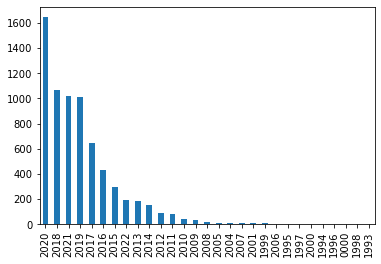

In [14]:
year_count = spotifyFeatures['release_year'].value_counts().plot(kind='bar')